In [4]:
%pip install deepface
%pip install scikit-learn
%pip install tqdm
%pip install numpy
%pip install pillow
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from deepface import DeepFace as dface
import os
from glob import glob
from sklearn.metrics import accuracy_score,  top_k_accuracy_score
from tqdm import tqdm

In [6]:
def analyzeEmotion(imagePath: str) -> str | None:
    try:
        result = dface.analyze(img_path=imagePath, actions=["emotion"], enforce_detection=False)
        return result[0]
    except Exception as e:
        print(f"Error processing image {imagePath}: {e}")
        return None

In [7]:
def getEmotionFromPath(imagePath: str) -> str:
    return imagePath.split("\\")[1]

In [8]:
def checkGuess(imagePath: str, result: str) -> bool:
    emotion = getEmotionFromPath(imagePath=imagePath)
    return emotion == result.lower()

In [9]:
def loadImages(imgDirectory: str, fileFormat = ".jpg") -> list[str]:
    images = [y for x in os.walk(imgDirectory) for y in glob(os.path.join(x[0], f'*{fileFormat}'))]
    if len(images) == 0:
        raise FileNotFoundError(f"No photos found in {imgDirectory} or directory doesn't exist")
    return images

In [10]:
imgDirectory = "../babyset"
images = loadImages(imgDirectory=imgDirectory)

correctGuesses, incorrectGuesses, faceNotFound = 0, 0, 0

yTrue = []
yPredProbs = []

for image in tqdm(images):
    result = analyzeEmotion(image)
    emotionResult = result["emotion"]
    dominantEmotion = result.get("dominant_emotion")
    if dominantEmotion is None:
        faceNotFound += 1
        continue
    yTrue.append(getEmotionFromPath(image))
    yPredProbs.append(list(emotionResult.values()))

    if checkGuess(image, dominantEmotion):
        correctGuesses += 1
    else:
        incorrectGuesses += 1


  0%|          | 0/688 [00:00<?, ?it/s]

100%|██████████| 688/688 [03:09<00:00,  3.64it/s]


In [11]:
print(f"Correct {correctGuesses} \nIncorrect {incorrectGuesses} \nFaces not found {faceNotFound}")

print(f"Top-1 accuracy - {round(top_k_accuracy_score(y_true=yTrue, y_score=yPredProbs, k=1), 2)}\n"+
      f"Top-3 accuracy - {round(top_k_accuracy_score(y_true=yTrue, y_score=yPredProbs, k=3), 2)}\n"+
      f"Top-5 accuracy - {round(top_k_accuracy_score(y_true=yTrue, y_score=yPredProbs, k=5), 2)}")

Correct 348 
Incorrect 340 
Faces not found 0
Top-1 accuracy - 0.32
Top-3 accuracy - 0.59
Top-5 accuracy - 0.75


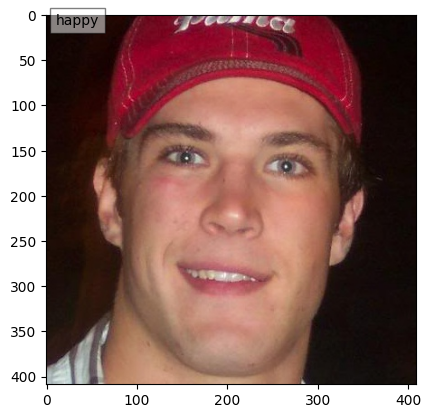

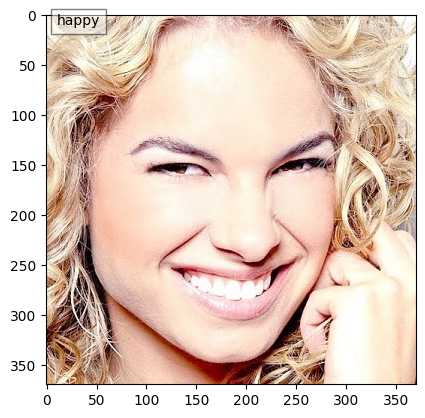

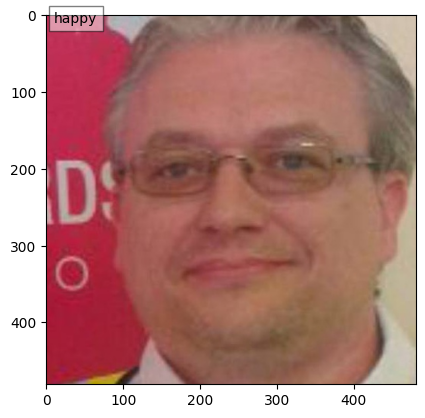

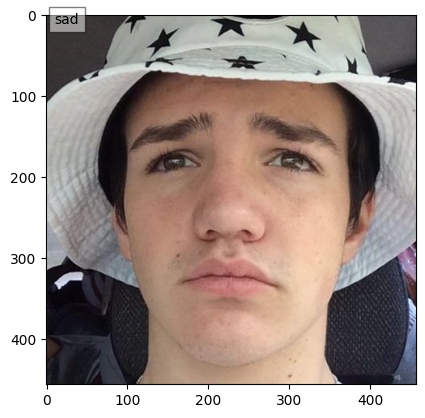

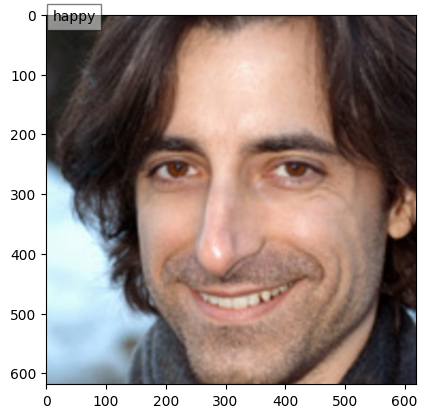

In [14]:

import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


for i in range(5):
    imagePath = random.choice(images)
    image = np.asarray(Image.open(imagePath))
    plt.imshow(image)
    result = analyzeEmotion(imagePath=imagePath)["dominant_emotion"]
    plt.text(10, 10, result, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()
